In [1]:
# STEP 1: Install and import the program
#
# clone the repo to your local directory
# navigate to the \bifacialvf directory which contains setup
# run pip install -e .

import bifacialvf    
import os
# change directory to \bifacialvf\ root
os.chdir(os.path.dirname(bifacialvf.__file__))
%pwd

'/home/tc256760/Apps/bifacialvf/bifacialvf'

In [2]:
#2. Set the Values of your test
# Remember all values are normalized to your panel length (slope, which will equal 1).
# If your slope is different than 1 m, desired C and rtr (or D) will need to be 
# divided by the slope length.
# i.e.: panel 1mx1.59m, in portrait mode means slope = 1.59. For a height C of 1m, C = 1/1.59. 
#         For a rtr of 1.5m, D=0.51519/1.59 if beta tilt angle = 10 

# Set mandatory variables
beta = 10                   # PV tilt (deg)
sazm = 180                  # PV Azimuth(deg)
C = 1                      # GroundClearance(panel slope lengths)
rtr = 1.5              # row to row spacing in panel lengths. 
GCR = 1.0/rtr             # Ground Cover Ratio

TMYtoread = "data/724010TYA.csv"   # VA Richmond
writefiletitle = "data/Output/test.csv"

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "glass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
albedo = 0.62               # ground albedo beneath system
# 1-axis tracking instructions (optional)
tracking=False
backtrack=True       # backtracking optimization as defined in pvlib



Notice that fixed systems use the parameter D, which is the space between the end of one panel and the beginning of the end, so it relates to the inclination angle beta. To go from a rtr value to D, you can use

from rtr_and_D_calculation import rtr2D
D = rtr2D(beta, rtr)

In [3]:
#3. Call the function.



bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rtr=rtr, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=tracking, backtrack=backtrack, )
    

/home/tc256760/Apps/bifacialvf/bifacialvf/bifacialvf.py:95: pvlibDeprecationWarning: The readtmy3 function was deprecated in pvlib 0.6.1 and will be removed in 0.7. Use iotools.read_tmy3 instead.
  (myTMY3,meta)=pvlib.tmy.readtmy3(TMYtoread)


FileNotFoundError: [Errno 2] No such file or directory: 'data/724010TYA.csv'

In [4]:
#4. Load the results from the resultfile
(data, metadata) = bifacialvf.loadVFresults(writefiletitle)
#print data.keys()
# calculate average front and back global tilted irradiance across the module chord
data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

# Print the annual bifacial ratio
frontIrrSum = data['GTIFrontavg'].sum()
backIrrSum = data['GTIBackavg'].sum()
print('The bifacial ratio for ground clearance {} and rtr spacing {} is: {:.1f}%'.format(C,rtr,backIrrSum/frontIrrSum*100))



The bifacial ratio for ground clearance 1 and rtr spacing 1.5 is: 16.3%


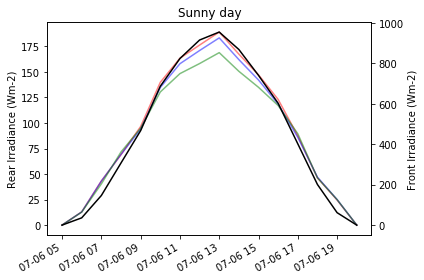

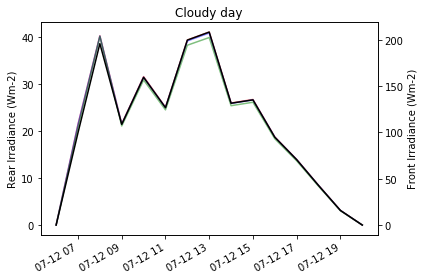

In [5]:
# plot the rear irradiance distribution for a single point in time. 1999-07-06
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

data['GTIBackstd'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].std(axis=1)
data['measdatetime'] = pd.to_datetime(data[['Year', 'Month', 'Day','Hour','Minute']])
singleday = (data['measdatetime'] > '1999-07-06') & (data['measdatetime']<'1999-07-07')
singleday2 = (data['measdatetime'] > '1999-07-12') & (data['measdatetime']<'1999-07-13')

fig, ax = plt.subplots()
ax1 = ax.twinx()
ax1.plot(data['measdatetime'][singleday],data['GTIFrontavg'][singleday],'k')
ax1.set_ylabel('Front Irradiance (Wm-2)')
ax.set_ylabel('Rear Irradiance (Wm-2)')
ax.plot(data['measdatetime'][singleday], data['No_1_RowBackGTI'][singleday],'r' , alpha =0.5)
ax.plot(data['measdatetime'][singleday], data['No_2_RowBackGTI'][singleday], 'b', alpha = 0.5)
ax.plot(data['measdatetime'][singleday], data['No_6_RowBackGTI'][singleday], 'g', alpha = 0.5)
ax.set_title('Sunny day')
fig.autofmt_xdate()
fig.tight_layout()


fig2, ax2 = plt.subplots()
ax3 = ax2.twinx()
ax3.plot(data['measdatetime'][singleday2],data['GTIFrontavg'][singleday2],'k')
ax3.set_ylabel('Front Irradiance (Wm-2)')
ax2.set_ylabel('Rear Irradiance (Wm-2)')
ax2.plot(data['measdatetime'][singleday2], data['No_1_RowBackGTI'][singleday2],'r' , alpha =0.5)
ax2.plot(data['measdatetime'][singleday2], data['No_2_RowBackGTI'][singleday2], 'b', alpha = 0.5)
ax2.plot(data['measdatetime'][singleday2], data['No_6_RowBackGTI'][singleday2], 'g', alpha = 0.5)
ax2.set_title('Cloudy day')
fig2.autofmt_xdate()
fig2.tight_layout()




# Example of 1-axis tracking


In [6]:
# tracker geometry options:
module_height = 4  # module portrait dimension in meters (2-up portrait 'module')
gcr = 0.35   # ground cover ratio,  = module_height / pitch
albedo = 0.3     # ground albedo
hub_height = 2.5   # tracker height at 0 tilt in meters (hub height)
limit_angle = 45 # tracker rotation limit angle

# Set mandatory variables
beta = 0                   # Tracking doesn't allow tilted trackers at the moment.
sazm = 180                  # PV Azimuth(deg) - tracker axis orientation for E-W tracked system.
C = hub_height / module_height                      # GroundClearance(panel slope lengths)
rtr = 1 / gcr              # row to row spacing in panel lengths. 


TMYtoread = "data/724010TYA.csv"   # VA Richmond
writefiletitle = "data/Output/1AxisTest.csv"

# Set optional variables.  These are the default values
rowType = "interior"        # RowType(first interior last single)
transFactor = 0.013         # TransmissionFactor(open area fraction)
cellRows = 6                # CellRows(# hor rows in panel)   This is the number of irradiance values returned along module chord
PVfrontSurface = "ARglass"    # PVfrontSurface(glass or ARglass)
PVbackSurface = "glass"     # PVbackSurface(glass or ARglass)
# 1-axis tracking instructions (optional)
tracking=True
backtrack=True       # backtracking optimization as defined in pvlib


In [7]:
#3. Call the function.

bifacialvf.simulate(TMYtoread, writefiletitle, beta, sazm, 
                C=C, rowType=rowType, transFactor=transFactor, cellRows=cellRows,
                PVfrontSurface=PVfrontSurface, PVbackSurface=PVbackSurface, albedo=albedo, 
                tracking=True, backtrack=backtrack, rtr=rtr, max_angle = limit_angle)
  

 
********* 
Running Simulation for TMY3:  data/724010TYA.csv
Location:   "RICHMOND INTERNATIONAL AP"
Lat:  37.517  Long:  -77.317  Tz  -5.0
Parameters: beta:  0   Sazm:  180   Height:  0.625   rtr separation:  2.85714285714   Row type:  interior   Albedo:  0.3
Saving into data/Output/1AxisTest.csv
 
 
Distance between rows for no shading on Dec 21 at 9 am solar time =  0.0
Actual distance between rows =  1.85714285714
 
 ***** IMPORTANT --> THIS SIMULATION Has Tracking Activated
Backtracking Option is set to:  True
Finished


In [8]:
#4. Load the results from the resultfile
(data, metadata) = bifacialvf.loadVFresults(writefiletitle)
#print data.keys()
# calculate average front and back global tilted irradiance across the module chord in 6 points
data['GTIFrontavg'] = data[['No_1_RowFrontGTI', 'No_2_RowFrontGTI','No_3_RowFrontGTI','No_4_RowFrontGTI','No_5_RowFrontGTI','No_6_RowFrontGTI']].mean(axis=1)
data['GTIBackavg'] = data[['No_1_RowBackGTI', 'No_2_RowBackGTI','No_3_RowBackGTI','No_4_RowBackGTI','No_5_RowBackGTI','No_6_RowBackGTI']].mean(axis=1)

# Print the annual bifacial ratio
frontIrrSum = data['GTIFrontavg'].sum()
backIrrSum = data['GTIBackavg'].sum()
print('The 1-axis tracked bifacial ratio for ground clearance {} and row to row {} is: {:.1f}%\n\n *****'.format(C,rtr,backIrrSum/frontIrrSum*100))


The 1-axis tracked bifacial ratio for ground clearance 0.625 and row to row 2.85714285714 is: 10.2%

 *****
